# Qatal
## Interpretations of qatal semantics in the translations

In [1]:
from my_tools import *

# Qatal

In [25]:
qatal_df.shape

(20728, 55)

In [26]:
qatal_df.head()

,ref,book,book_super,canon_part,text_full,text_plain,lex,lex_etcbc,gloss,verb_form,...,niv,niv_tags,niv_VBtags,niv_tense,niv_aspect,niv_modality,niv_TAM,niv_TAMtag,niv_TAMspan,safe
bhsa_node,,,,,,,,,,,,,,,,,,,,,
3,Genesis 1:1,Genesis,Genesis,Law,בָּרָ֣א,ברא,ברא,BR>[,create,qtl,...,created,VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,created,True
15,Genesis 1:2,Genesis,Genesis,Law,הָיְתָ֥ה,היתה,היה,HJH[,be,qtl,...,was,VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,was,True
47,Genesis 1:4,Genesis,Genesis,Law,טֹ֑וב,טוב,טוב,VWB[,be good,qtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
69,Genesis 1:5,Genesis,Genesis,Law,קָ֣רָא,קרא,קרא,QR>[,call,qtl,...,he called,PRP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,called,True
172,Genesis 1:10,Genesis,Genesis,Law,קָרָ֣א,קרא,קרא,QR>[,call,qtl,...,he called,PRP|VBD,VBD,PAST,NaN,IND,PAST..IND,PAST,called,True


In [27]:
qatal_df.columns

Index(['ref', 'book', 'book_super', 'canon_part', 'text_full', 'text_plain',
       'lex', 'lex_etcbc', 'gloss', 'verb_form', 'stem', 'person', 'gender',
       'number', 'sentence', 'genre', 'domain', 'period', 'txt_type',
       'clause_type', 'clause_rela', 'adjacent_waw', 'mother_clause',
       'mother_type', 'valence', 'pre_lexes', 'pre_pos', 'lxx', 'lxx_tense',
       'lxx_voice', 'lxx_mood', 'lxx_person', 'lxx_number', 'lxx_tm',
       'preceding_waw', 'wordsb4waw', 'esv', 'esv_tags', 'esv_VBtags',
       'esv_tense', 'esv_aspect', 'esv_modality', 'esv_TAM', 'esv_TAMtag',
       'esv_TAMspan', 'niv', 'niv_tags', 'niv_VBtags', 'niv_tense',
       'niv_aspect', 'niv_modality', 'niv_TAM', 'niv_TAMtag', 'niv_TAMspan',
       'safe'],
      dtype='object')

# LXX

### Overall Translation Technique for Qatal

In [28]:
# book raw counts
lxx_qvb = pd.pivot_table(
    qatal_df,
    index='book_super',
    columns='lxx_tm',
    aggfunc='size',
    fill_value=0,
)

# book prop counts
lxx_qvb_prop = lxx_qvb.div(lxx_qvb.sum(1), 0)

In [29]:
lxx_qatal_verbs = qatal_df.lxx_tm.value_counts()
lxx_qv_prop = lxx_qatal_verbs / lxx_qatal_verbs.sum()

In [30]:
lxx_qv_prop

aorist indc        0.512833
future indc        0.261219
perfect indc       0.050333
present indc       0.047289
imperfect indc     0.038787
aorist subj        0.030126
aorist ptcp        0.016480
present ptcp       0.010759
aorist impv        0.010130
aorist infv        0.006036
perfect ptcp       0.005144
present subj       0.003202
pluperfect indc    0.002729
present impv       0.001942
present infv       0.001365
aorist optv        0.000630
perfect infv       0.000420
future ptcp        0.000262
present optv       0.000105
future subj        0.000052
imperfect subj     0.000052
perfect impv       0.000052
pluperfect ptcp    0.000052
Name: lxx_tm, dtype: float64

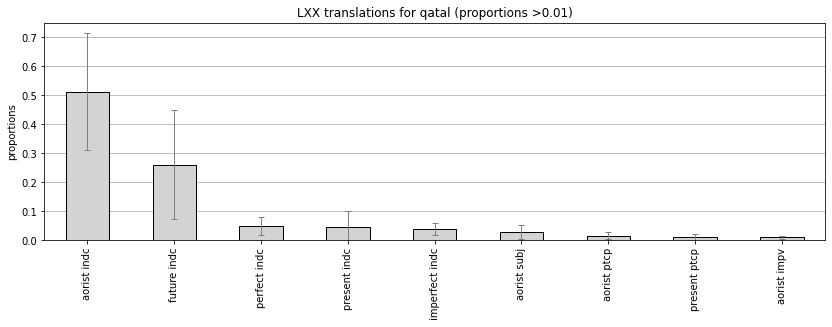

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
title = 'LXX translations for qatal (proportions >0.01)'
plot_bar_1D(
    lxx_qv_prop[lxx_qv_prop > 0.01], ax, title=title, ylabel='proportions',
    yerr=lxx_qvb_prop.std(),
    error_kw=dict(ecolor='gray', lw=1, capsize=3)
)
plt.ylim(0, 0.75)
save_fig('lxx_qatal_trans')

We will analyze down to the aorist subjunctive.

In [32]:
select_lxx_tenses = lxx_qv_prop[:6].index

select_lxx_tenses

Index(['aorist indc', 'future indc', 'perfect indc', 'present indc',
       'imperfect indc', 'aorist subj'],
      dtype='object')

In [33]:
lxx_transs = qatal_df[qatal_df.lxx_tm.isin(select_lxx_tenses)]

# assemble a count by book(super) which allows us 
# to calculate standard deviations within various 
# segmentations of the LXX
vts_book = pd.pivot_table(
        lxx_transs,
        index='book_super',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)

vts_prop = prop_table(vts_book)

# sort by most frequent to least
vts_book = vts_book[vts_book.sum().sort_values(ascending=False).index]

vts_book.head()

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj,aorist indc,future indc,aorist subj,imperfect indc,present indc,perfect indc
adjacent_waw,False,True,False,False,False,True,True,False,False,True,True,True
book_super,,,,,,,,,,,,
Chronicles,819,55,28,18,79,30,25,1,1,5,1,2
Daniel,79,65,2,1,7,1,11,2,3,1,0,0
Deuteronomy,396,472,51,21,21,91,6,3,4,0,1,0
Exodus,298,427,76,21,27,50,14,2,7,12,2,0
Ezekiel,418,664,94,141,55,22,33,30,20,3,4,4


### By waw-status

In [34]:
lxx_waw = PivotProp(lxx_transs, 'adjacent_waw', 'lxx_tm')

lxx_waw.ct

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj
adjacent_waw,,,,,,
False,9367,336,938,841,653,144
True,404,4641,21,60,86,430


In [35]:
lxx_waw.pr

lxx_tm,aorist indc,future indc,perfect indc,present indc,imperfect indc,aorist subj
adjacent_waw,,,,,,
False,0.762847,0.027364,0.076391,0.068491,0.053180,0.011727
True,0.071606,0.822581,0.003722,0.010635,0.015243,0.076214


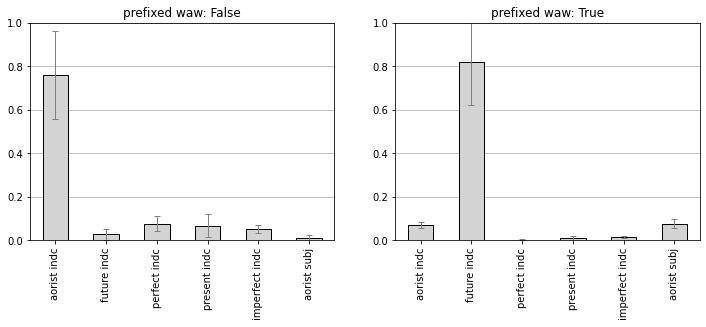

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.ravel()

for i, waw_stat in enumerate([False, True]):
    
    # select status by book to calculate std for error bars
    by_book = vts_prop.loc[:, pd.IndexSlice[:,waw_stat]]
    by_book.columns = by_book.columns.droplevel('adjacent_waw')
    
    data = lxx_waw.pr.loc[waw_stat]
    ax = axs[i]
    plot_bar_1D(
        data, ax, 
        title=f'prefixed waw: {waw_stat}',
        yerr=by_book.std(),
        error_kw=dict(ecolor='gray', lw=1, capsize=3)
    )
    ax.set_ylim(0, 1.0)

In [37]:
vts_prop.loc[:, pd.IndexSlice[:,True]].std()

lxx_tm          adjacent_waw
aorist indc     True            0.014991
aorist subj     True            0.021063
future indc     True            0.198131
imperfect indc  True            0.004575
perfect indc    True            0.002431
present indc    True            0.011422
dtype: float64

In [38]:
vts_prop.loc[:, pd.IndexSlice[:,False]].std()

lxx_tm          adjacent_waw
aorist indc     False           0.202497
aorist subj     False           0.014191
future indc     False           0.023575
imperfect indc  False           0.018927
perfect indc    False           0.034593
present indc    False           0.054549
dtype: float64

### statistics across parts of canon (tripartite)

In [39]:
vts_canon = pd.pivot_table(
        lxx_transs,
        index='canon_part',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

vts_canon

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
canon_part                                                           
Law                 1717    41          44   233          19  2035   
Prophets            4549   237          65   142         245  2391   
Writings            3101   126          35    55          72   215   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
canon_part                                                               
Law                     127    28          279     1          113     6  
Prophets                342    44          523    13          584    36  
Writings                184    14          136     7          144    18

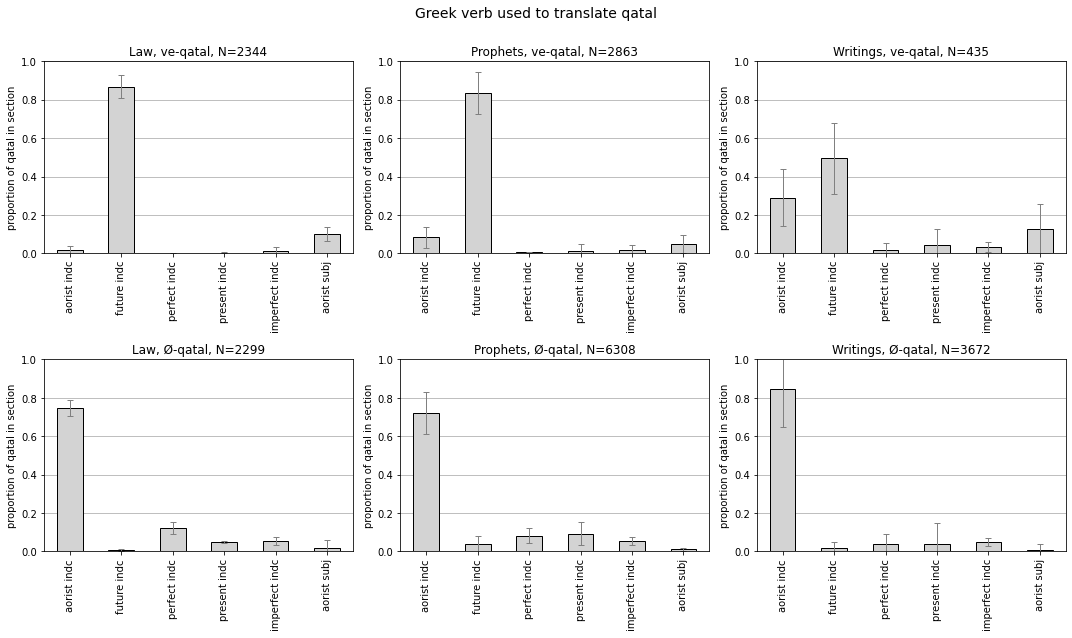

In [40]:
def plot_waw_sections(section_name, book_counts, sect_counts, dims, figsize=(15,9), title=''):
    """Build qatal plots based on various segments / waw-statuses"""

    fig, axs = plt.subplots(dims[0], dims[1], figsize=figsize)
    axs = axs.ravel()
    i = 0
    data_container = collections.defaultdict(dict)
    for waw_status, waw_str in [[True, ', ve-qatal'], [False, ', Ø-qatal']]:

        # use the waw status to retrieve the raw counts 
        # and proportions unique to that status
        # individual book counts are also needed to calculuate the 
        # error bars using standard deviation
        count_books = book_counts.loc[:, pd.IndexSlice[:, waw_status]]
        count_sect = sect_counts.loc[:, pd.IndexSlice[:, waw_status]]
        prop_books = get_props(count_books)
        prop_sect = get_props(count_sect)
        prop_sect.columns = prop_sect.columns.droplevel('adjacent_waw')
        prop_books.columns = prop_books.columns.droplevel('adjacent_waw')

        # sort by sample sizes
        book_counts_clean = book_counts.groupby(level=book_counts.columns.names[0], axis=1).sum()
        prop_sect = prop_sect[book_counts_clean.sum().sort_values(ascending=False).index] # sort on size of samples

        for part in prop_sect.index:

            ax = axs[i]
            i += 1

            data = prop_sect.loc[part]

            books = qatal_df[qatal_df[section_name] == part].book_super.unique()
            tense_stds_inbooks = prop_books.loc[books].std()

            data.plot(
                kind='bar', ax=ax, color='lightgrey', 
                edgecolor='black', yerr=tense_stds_inbooks,
                error_kw=dict(ecolor='gray', lw=1, capsize=3)
            )

            plot_title = f'{part}{waw_str}, N={count_sect.loc[part].sum().sum()}'
            ax.set_title(plot_title)
            ax.set_ylim(0, 1)
            ax.grid(axis='y')
            ax.set_axisbelow(True)
            ax.set_xlabel('')
            ax.set_ylabel('proportion of qatal in section')
            #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
            fig.suptitle(title, size=14)
            fig.tight_layout() # set spacing between plots automatically
        
            data_container[part][waw_status] = data
            data_container[part+'_std'][waw_status] = tense_stds_inbooks
            
    return data_container
        
plot_waw_sections('canon_part', vts_book, vts_canon, (2,3), title='Greek verb used to translate qatal\n')
save_fig('lxx_qatal_canon')

### By period

In [41]:
lxx_period = pd.pivot_table(
        lxx_transs,
        index='period',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

In [42]:
lxx_period

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
period                                                               
EBH                 3940   146          56   310          41  2540   
LBH                 1241    52           4    42           4   129   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
period                                                                   
EBH                     321    60          550     4          238    27  
LBH                     116     7           37     2           29     1

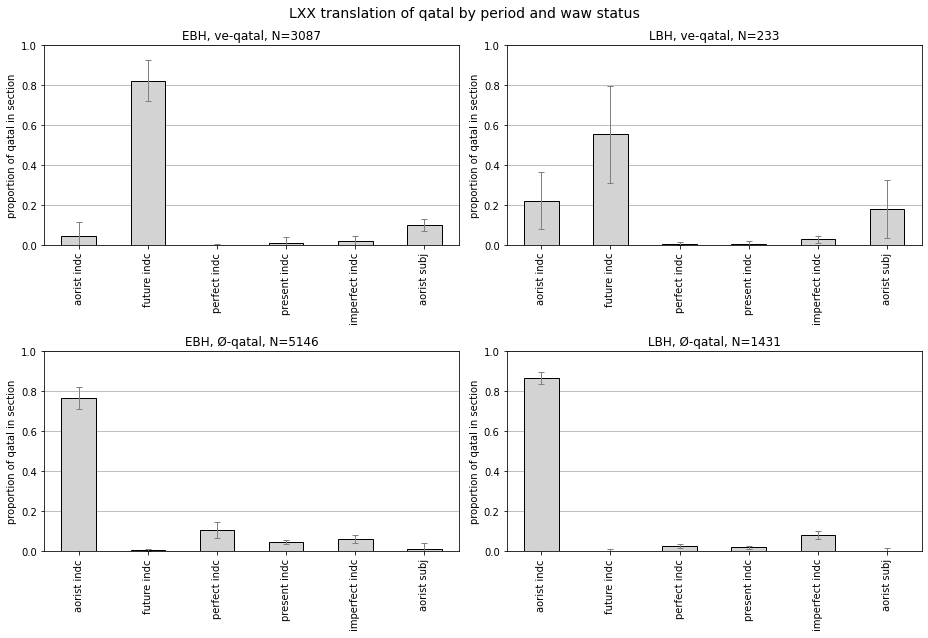

In [43]:
lxx_waw_period = plot_waw_sections(
    'period', vts_book, lxx_period, [2, 2], 
    figsize=(13, 9), title='LXX translation of qatal by period and waw status')
save_fig('lxx_qatal_period')

In [44]:
lxx_transs.genre.value_counts()

prose          7556
prophetic      5380
poetry         2568
instruction    1953
list            464
Name: genre, dtype: int64

In [45]:
pd.pivot_table(
    lxx_transs,
    index='genre',
    columns=['period'],
    aggfunc='size',
    fill_value=0,
)

period,EBH,LBH
genre,,
instruction,1879,0
list,223,241
poetry,173,68
prophetic,15,0
prose,5943,1355


### By Genre

In [46]:
lxx_genre = pd.pivot_table(
        lxx_transs[lxx_transs.genre.isin(['prose', 'prophetic', 'poetry'])],
        index='genre',
        columns=['lxx_tm', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

In [47]:
lxx_genre

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
genre                                                                
poetry              1979    79          29    16          76    79   
prophetic           2229   124          53    63         224  1831   
prose               4558   180          25   203          32  1263   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
genre                                                                    
poetry                   63     5           97     5          122    18  
prophetic               137    11          243    10          440    15  
prose                   412    69          539     6          256    13

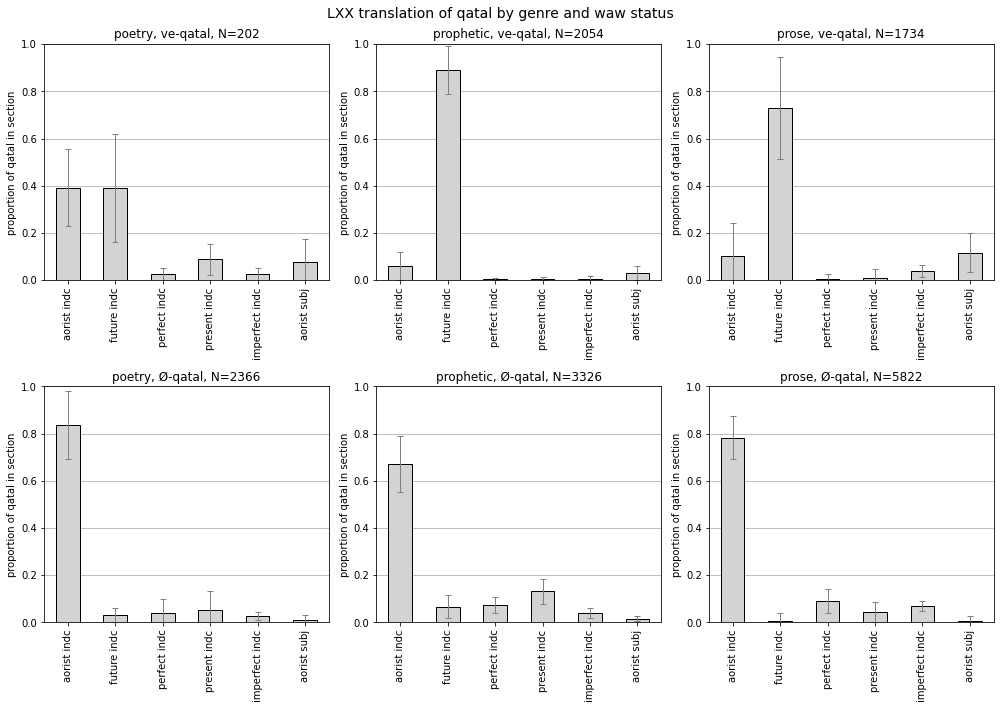

In [48]:
lxx_waw_genre = plot_waw_sections(
    'genre', vts_book, lxx_genre, [2, 3], 
    figsize=(14, 10), title='LXX translation of qatal by genre and waw status')
save_fig('lxx_qatal_genre')

# NB: THE ERROR BARS IN THIS CASE CANNOT BE 
# RELIED ON; they are calculated from books,
# and books can contain numerous genres

In [49]:
lxx_waw_genre['poetry'][True]

lxx_tm
aorist indc       0.391089
future indc       0.391089
perfect indc      0.024752
present indc      0.089109
imperfect indc    0.024752
aorist subj       0.079208
Name: poetry, dtype: float64

In [50]:
lxx_waw_genre['poetry_std'][True]

lxx_tm
future indc       0.227929
aorist subj       0.096910
aorist indc       0.163095
imperfect indc    0.026074
present indc      0.065865
perfect indc      0.026412
dtype: float64

In [51]:
lxx_genre

lxx_tm       aorist indc       aorist subj       future indc        \
adjacent_waw       False True        False True        False True    
genre                                                                
poetry              1979    79          29    16          76    79   
prophetic           2229   124          53    63         224  1831   
prose               4558   180          25   203          32  1263   

lxx_tm       imperfect indc       perfect indc       present indc        
adjacent_waw          False True         False True         False True   
genre                                                                    
poetry                   63     5           97     5          122    18  
prophetic               137    11          243    10          440    15  
prose                   412    69          539     6          256    13

In [52]:
lxx_genre.loc[:, pd.IndexSlice[:,True]]

lxx_tm,aorist indc,aorist subj,future indc,imperfect indc,perfect indc,present indc
adjacent_waw,True,True,True,True,True,True
genre,,,,,,
poetry,79,16,79,5,5,18
prophetic,124,63,1831,11,10,15
prose,180,203,1263,69,6,13


### Which poetic books show the weakest waw contrast?

We see a weakened contrast in poetic books between qatal and ve-qatal 
uses of qatal. But the standard deviation shows that there is a great
deal of variation in-between books. Let's see which books fall where.

In [53]:
lxx_book_veqatal = vts_book.loc[:, pd.IndexSlice[:, True]]
lxx_book_veqatal_pr = prop_table(lxx_book_veqatal)

lxx_book_veqatal

lxx_tm,future indc,aorist subj,aorist indc,imperfect indc,present indc,perfect indc
adjacent_waw,True,True,True,True,True,True
book_super,,,,,,
Chronicles,55,30,25,5,1,2
Daniel,65,1,11,1,0,0
Deuteronomy,472,91,6,0,1,0
Exodus,427,50,14,12,2,0
Ezekiel,664,22,33,3,4,4
Ezra-Neh,8,10,13,0,0,0
Genesis,142,19,11,10,1,1
Isaiah,394,17,30,2,2,2


In [54]:
lxx_book_veqatal.loc['Proverbs'].sum()

32

In [55]:
lxx_book_veqatal_pr.loc[lxx_transs[lxx_transs.genre == 'poetry'].book_super.unique()]

lxx_tm,future indc,aorist subj,aorist indc,imperfect indc,present indc,perfect indc
adjacent_waw,True,True,True,True,True,True
book_super,,,,,,
Genesis,0.771739,0.103261,0.059783,0.054348,0.005435,0.005435
Exodus,0.845545,0.099010,0.027723,0.023762,0.003960,0.000000
Numbers,0.897756,0.067332,0.014963,0.014963,0.004988,0.000000
Deuteronomy,0.828070,0.159649,0.010526,0.000000,0.001754,0.000000
Judges,0.677083,0.145833,0.135417,0.041667,0.000000,0.000000
Samuel,0.656604,0.105660,0.147170,0.075472,0.007547,0.007547
Twelve,0.903491,0.014374,0.067762,0.010267,0.004107,0.000000
Psalms,0.475410,0.000000,0.459016,0.049180,0.016393,0.000000


# Modern Translations

Here we turn to data labeled "safe" for use, with known parsing errors being
filtered out.

This is stored under `qatal_dfs` (s for safe)

In [9]:
qatal_dfs.shape

(20377, 55)

In [10]:
modagr_df = qatal_dfs[qatal_dfs.niv_TAM == qatal_dfs.esv_TAM] # restrict to agreement between sources

modagr_df.shape

(13162, 55)

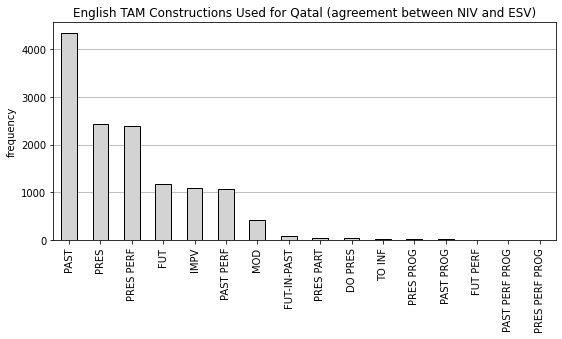

In [11]:
fig, ax = plt.subplots(figsize=(9, 4))
title = 'English TAM Constructions Used for Qatal (agreement between NIV and ESV)'
plot_bar_1D(modagr_df.esv_TAMtag.value_counts(), ax=ax, title=title, ylabel='frequency')
save_fig('mod_qatal_agree')

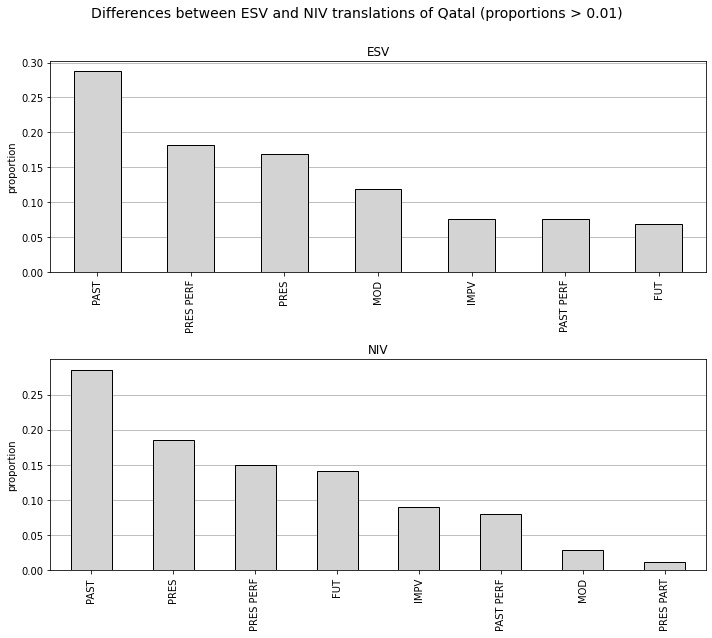

In [12]:
plot_transs = [
    ('ESV', 'esv_TAMtag'),
    ('NIV', 'niv_TAMtag'),
]

fig, axs = plt.subplots(2, 1, figsize=(10, 9))
axs = axs.ravel()

trans2prop = {}

i = 0
for trans, tamtag in plot_transs:
    ax = axs[i]
    title = f'{trans}'
    data = qatal_dfs[tamtag].value_counts()
    data = data / data.sum()
    data_top = data[data > 0.01]# filter out tiny data
    plot_bar_1D(data_top, ax=ax, title=title, ylabel='proportion')
    trans2prop[trans] = data
    i += 1
    
fig.suptitle('Differences between ESV and NIV translations of Qatal (proportions > 0.01)\n', size=14)
fig.tight_layout() # set spacing between plots automatically
save_fig('mod_trans_diffs')

In [13]:
trans2prop['ESV']

PAST              0.287215
PRES PERF         0.181511
PRES              0.168668
MOD               0.118702
IMPV              0.076067
PAST PERF         0.075807
FUT               0.069204
FUT-IN-PAST       0.007383
PRES PART         0.006239
TO INF            0.003068
DO PRES           0.002808
PAST PROG         0.001664
PRES PROG         0.001040
PRES PERF PROG    0.000260
FUT PERF          0.000260
PAST PERF PROG    0.000104
Name: esv_TAMtag, dtype: float64

In [14]:
trans2prop['NIV']

PAST              0.285562
PRES              0.185823
PRES PERF         0.150515
FUT               0.141181
IMPV              0.090138
PAST PERF         0.079898
MOD               0.029335
PRES PART         0.011414
TO INF            0.008267
FUT-IN-PAST       0.006880
PRES PROG         0.004160
PAST PROG         0.002880
DO PRES           0.002560
PAST PERF PROG    0.000480
PRES PERF PROG    0.000427
FUT PERF          0.000267
GOING TO          0.000213
Name: niv_TAMtag, dtype: float64

In [15]:
qatal_df['niv_TAMtag'].value_counts()

PAST              5456
PRES              3491
PRES PERF         2839
FUT               2651
IMPV              1830
PAST PERF         1500
MOD                550
PRES PART          231
TO INF             169
FUT-IN-PAST        131
PRES PROG           82
PAST PROG           54
DO PRES             48
PAST PERF PROG       9
PRES PERF PROG       8
FUT PERF             6
GOING TO             4
Name: niv_TAMtag, dtype: int64

We make a subselection of translations to focus on:

In [63]:
select_eng_verbs = trans2prop['ESV'][trans2prop['ESV'] > 0.01].index
select_eng_verbs

Index(['PAST', 'PRES PERF', 'PRES', 'MOD', 'IMPV', 'PAST PERF', 'FUT'], dtype='object')

In [64]:
esv_df = qatal_dfs[qatal_dfs.esv_TAMtag.isin(select_eng_verbs)]

### ESV Tendencies

In [65]:
mod_book = pd.pivot_table(
        esv_df,
        index='book_super',
        columns=['esv_TAMtag', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)

mod_book

esv_TAMtag     FUT        IMPV         MOD        PAST       PAST PERF        \
adjacent_waw False True  False True  False True  False True      False True    
book_super                                                                     
Chronicles       2    23     1    36     8     9   628    15       168     0   
Daniel           0     1     1    17     1    51    51    11         7     0   
Deuteronomy      2    63     6   133     0   242   235     7        51     0   
Exodus           2    63     3    96    11   276   232    19        78     0   
Ezekiel         14   289    10   166     4   227   284    37        44     1   
Ezra-Neh         0     1     3     9     3     5   162     9        65     1   
Genesis          1    56    11    40     9    58   374    14       161     0   
Isaiah          18   195    20    54    21   129   214    15        36     0   
Jeremiah        15   159    28   106    24   180   318    17       112     0   
Job              4    11    21     6     8     4    94     9        18     0   
Joshua           0    13     1    27     3    29   235     3        73     0   
Judges           1    14    11    34     3    15   209    10        89     0   
Kings            3    59     8    90    11    47   687    43       194     1   
Leviticus        3    44     1   145     0   425    66    12         3     1   
Megilloth        4     2     6    21     2     5   257    27        70     1   
Numbers          0    22     0    78     5   212   200    16        45     0   
Proverbs         1     8    15    11     0     0    26     0         5     0   
Psalms           7     9    35     7    12     6   296    15        38     0   
Samuel           4    64    19    94     5    52   464    36       172     0   
Twelve           9   151    24    77     9   183   187    15        24     0   

esv_TAMtag    PRES       PRES PERF        
adjacent_waw False True      False True   
book_super                                
Chronicles      48    19       133     7  
Daniel           8     3        28     0  
Deuteronomy     41   100       178     3  
Exodus          36    51       123     2  
Ezekiel        245    66       212     4  
Ezra-Neh         8     2        38     2  
Genesis         62    15       214     0  
Isaiah         319    40       333     2  
Jeremiah       398    47       394    12  
Job            205    21       124     2  
Joshua          17    63        75     0  
Judges          20     5        82     0  
Kings          101    25       205     5  
Leviticus       25    46        82     5  
Megilloth      124    18       201     1  
Numbers         32    41       119     6  
Proverbs        86    25        42     0  
Psalms         475    21       361     2  
Samuel          87    18       291     3  
Twelve         245    39       199     3

In [66]:
mod_period = pd.pivot_table(
        esv_df,
        index='period',
        columns=['esv_TAMtag', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)



mod_period

esv_TAMtag     FUT        IMPV         MOD        PAST       PAST PERF        \
adjacent_waw False True  False True  False True  False True      False True    
period                                                                         
EBH             16   398    60   737    47  1356  2702   160       866     2   
LBH              2    25     5    63    14    68   907    38       282     2   

esv_TAMtag    PRES       PRES PERF        
adjacent_waw False True      False True   
period                                    
EBH            421   364      1369    24  
LBH             73    26       220     9

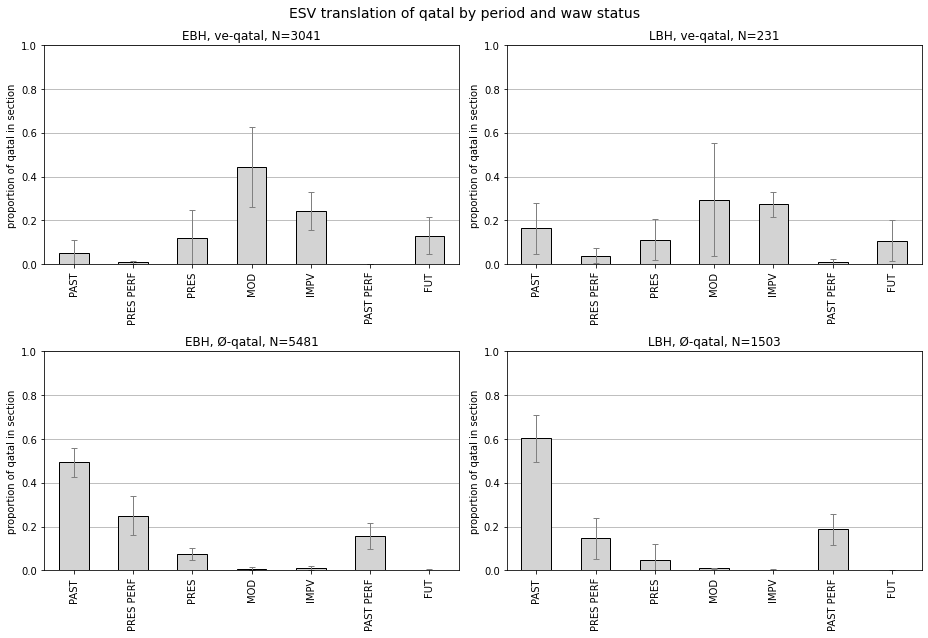

In [67]:
plot_waw_sections(
    'period', mod_book, mod_period, [2,2], 
    figsize=(13,9), title='ESV translation of qatal by period and waw status'
)

save_fig('esv_qatal_period')

## Modern translations vs. LXX